In [51]:
# copy of Demonstration

800


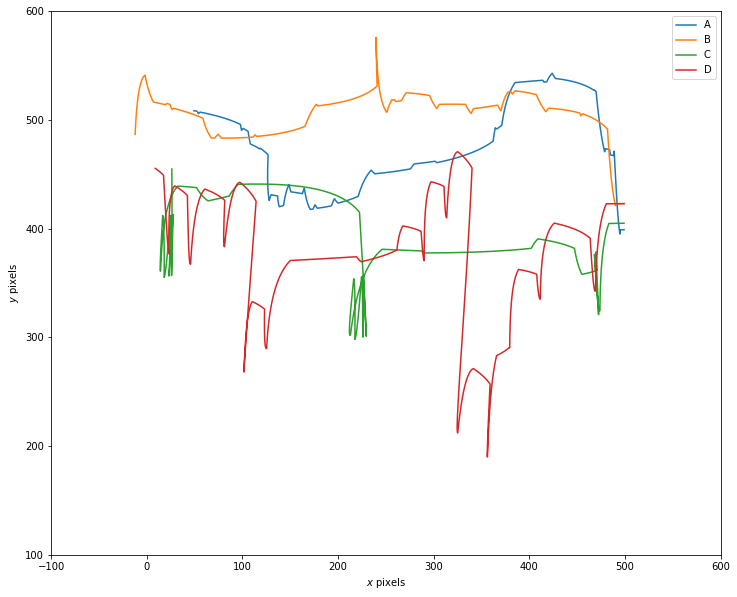

In [64]:
# -*- coding: utf-8 -*-
from __future__ import division

import sys
import matplotlib.pyplot as plt
%matplotlib inline
import json

# before importing we need to extend our sys.path
sys.path.append('/Users/alex/Documents/repos/mothpy/mothpy/')
from kalman import kalman_filter

fig, ax = plt.subplots(figsize=(12,10))
color_wheel =['-g','-m','-y','-k']
   
def plot(kalman_dict):
    # num_it = len(kalman_dict)
    # graphic function - shows only kalman trajectories, saves as file
    
    for key, val in kalman_dict.items(): #present the different kalman trajectories
        # kzip = zip(*kalman_dict["Kalman_list{0}".format(i)])
        # kzip = list(list(zip(*kalman_dict["Kalman_list{0}".format(i)])))
        kzip = list(list(zip(*val)))
        kx,ky = kzip[0],kzip[1]       
        ax.plot(kx,ky)#,color = color_wheel[i])

    ax.set_ylim(100,600)
    ax.set_xlim(-100,600)
    ax.set_xlabel('$x$ pixels')
    ax.set_ylabel('$y$ pixels')
    # pylab.title(title)
    ax.legend(('A','B','C','D'))
    #pylab.legend(loc='upper left')  
    # pylab.show()
    # pylab.savefig(title + '.png')
    #pylab.clf() 
    
def disp(dic, disp_size):
    old_list = dic["diff_list{0}".format(0)]
    new_list = []
    new_dic = {}
    for tup in old_list:
        new_tup = (tup[0],tup[1]+disp_size,tup[2],tup[3],tup[4])
        new_list.append(new_tup)
    new_dic["diff_list{0}".format(0)]= new_list
    return new_dic
    
#if __name__ == "__main__":
for i in range(1):
    with open('/Users/alex/Downloads/data0.json') as data_file2:  
        dict_list = json.load(data_file2) 
    new_dict ={}
    print(len(dict_list))
    kalman_dict0 = disp(dict_list[137],0)

    kalman_dict1 = disp(dict_list[369],0)
    kalman_dict2 = disp(dict_list[495],0)
    kalman_dict3 = dict_list[789]

    new_dict["diff_list0"] = kalman_dict0["diff_list{0}".format(0)] 
    new_dict["diff_list1"] = kalman_dict1["diff_list{0}".format(0)]
    new_dict["diff_list2"] = kalman_dict2["diff_list{0}".format(0)]
    new_dict["diff_list3"] = kalman_dict3["diff_list{0}".format(0)]

    
    kalman_dict = kalman_filter(new_dict)
    plot(kalman_dict)

